In [3]:
import math
import random as rand
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:.4f}'.format


In [4]:
df = pd.read_csv (r'./museums.csv')

/home/ming/miniconda3/envs/data1/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (9,14,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
df.head(5)

,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,Latitude,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue
0,8400200098,ALASKA AVIATION HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,4721 AIRCRAFT DR,ANCHORAGE,AK,99502,...,61.1793,-149.9725,1.0000,20.0000,2.0000,6,920071852,201312.0000,602912.0000,550236.0000
1,8400200117,ALASKA BOTANICAL GARDEN,ALASKA BOTANICAL GARDEN INC,NaN,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",NaN,4601 CAMPBELL AIRSTRIP RD,ANCHORAGE,AK,99507,...,61.1689,-149.7671,4.0000,20.0000,2.0000,6,920115504,201312.0000,1379576.0000,1323742.0000
2,8400200153,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,NaN,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,NaN,9711 KENAI SPUR HWY,KENAI,AK,99611,...,60.5615,-151.2160,3.0000,122.0000,2.0000,6,921761906,201312.0000,740030.0000,729080.0000
3,8400200143,ALASKA EDUCATORS HISTORICAL SOCIETY,ALASKA EDUCATORS HISTORICAL SOCIETY,NaN,HISTORIC PRESERVATION,NaN,214 BIRCH STREET,KENAI,AK,99611,...,60.5628,-151.2660,3.0000,122.0000,2.0000,6,920165178,201412.0000,0.0000,0.0000
4,8400200027,ALASKA HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,301 W NORTHERN LIGHTS BLVD,ANCHORAGE,AK,99503,...,61.1793,-149.9725,1.0000,20.0000,2.0000,6,920071852,201312.0000,602912.0000,550236.0000


In [11]:
# Show the column Datatypes
dataTypeSeries = df.dtypes
dataTypeSeries

# carmen = {
#     "name": "Carmen", 
#     "age": 31, 
#     "height": 200, 
#     "hobbies": [
#         {"name": "Dancing"}, {"name": "Singing"}
#     ]
# }
# print(carmen)

Museum ID                                     int64
Museum Name                                  object
Legal Name                                   object
Alternate Name                               object
Museum Type                                  object
Institution Name                             object
Street Address (Administrative Location)     object
City (Administrative Location)               object
State (Administrative Location)              object
Zip Code (Administrative Location)           object
Street Address (Physical Location)           object
City (Physical Location)                     object
State (Physical Location)                    object
Zip Code (Physical Location)                float64
Phone Number                                 object
Latitude                                    float64
Longitude                                   float64
Locale Code (NCES)                          float64
County Code (FIPS)                          float64
State Code (

In [12]:
# Show the columsn of the dataframe
df.columns

Index(['Museum ID', 'Museum Name', 'Legal Name', 'Alternate Name',
       'Museum Type', 'Institution Name',
       'Street Address (Administrative Location)',
       'City (Administrative Location)', 'State (Administrative Location)',
       'Zip Code (Administrative Location)',
       'Street Address (Physical Location)', 'City (Physical Location)',
       'State (Physical Location)', 'Zip Code (Physical Location)',
       'Phone Number', 'Latitude', 'Longitude', 'Locale Code (NCES)',
       'County Code (FIPS)', 'State Code (FIPS)', 'Region Code (AAM)',
       'Employer ID Number', 'Tax Period', 'Income', 'Revenue'],
      dtype='object')

In [19]:
# Clean the data frame by dropping all the null values from specific columns
cleanDf = df.dropna(subset=["Income", "Revenue"])
cleanDf.shape


(22290, 25)

In [23]:
cleanDf[cleanDf["Income"] > 0]

,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,Latitude,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue
0,8400200098,ALASKA AVIATION HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,4721 AIRCRAFT DR,ANCHORAGE,AK,99502,...,61.1793,-149.9725,1.0000,20.0000,2.0000,6,920071852,201312.0000,602912.0000,550236.0000
1,8400200117,ALASKA BOTANICAL GARDEN,ALASKA BOTANICAL GARDEN INC,NaN,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",NaN,4601 CAMPBELL AIRSTRIP RD,ANCHORAGE,AK,99507,...,61.1689,-149.7671,4.0000,20.0000,2.0000,6,920115504,201312.0000,1379576.0000,1323742.0000
2,8400200153,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,NaN,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,NaN,9711 KENAI SPUR HWY,KENAI,AK,99611,...,60.5615,-151.2160,3.0000,122.0000,2.0000,6,921761906,201312.0000,740030.0000,729080.0000
4,8400200027,ALASKA HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,301 W NORTHERN LIGHTS BLVD,ANCHORAGE,AK,99503,...,61.1793,-149.9725,1.0000,20.0000,2.0000,6,920071852,201312.0000,602912.0000,550236.0000
6,8400200078,ALASKA JEWISH MUSEUM,ALASKA JEWISH HISTORICAL MUSEUM AND CULTURAL C...,NaN,GENERAL MUSEUM,NaN,1117 E 35TH AVE,ANCHORAGE,AK,99508,...,61.1895,-149.8607,1.0000,20.0000,2.0000,6,711010049,201312.0000,2658938.0000,34374.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33051,8405600130,WESTERN PLAINS HISTORIC PRESERVATION ASSOCIATION,WESTERN PLAINS HISTORIC PRESERVATION ASSOCIATI...,NaN,HISTORIC PRESERVATION,NaN,2308 HWY 26,LINGLE,WY,82223,...,42.1303,-104.3869,4.0000,15.0000,56.0000,5,830290103.0000,201312.0000,337100.0000,337100.0000
33054,8405600156,WIND RIVER HERITAGE CENTER,WIND RIVER HERITAGE CENTER,NaN,HISTORY MUSEUM,NaN,PO BOX 206,RIVERTON,WY,82501,...,43.0351,-108.3805,3.0000,13.0000,56.0000,5,830317404.0000,201412.0000,36773.0000,36399.0000
33063,8405600122,WYOMING SECONDARY ART EDUCATORS ASSOCIATION,WYOMING SECONDARY ART EDUCATORS ASSOCIATION INC,NaN,ART MUSEUM,NaN,601 GRACE AVE,WORLAND,WY,82401,...,44.0138,-107.9600,3.0000,43.0000,56.0000,5,830265250.0000,201312.0000,43695.0000,43695.0000
33069,8405600158,WYOMING TERRITORIAL PARK HISTORIC ASSOCIATION,WYOMING TERRITORIAL PARK HISTORIC ASSOCIATION INC,NaN,HISTORIC PRESERVATION,NaN,1273 N 15TH ST STE 121,LARAMIE,WY,82072,...,41.3228,-105.5769,3.0000,1.0000,56.0000,5,830318392.0000,201312.0000,208508.0000,83981.0000


In [24]:
# show only museums that are making money >> only rows where income and revenue do not equal zero
moneyMakingMuseums = cleanDf[cleanDf.Income > 0]
np.round(moneyMakingMuseums.describe(include='all'), decimals=2)

,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,Latitude,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue
count,11557.0000,11557,11557,1270,11557,970,11557,11557,11557,11557,...,11543.0000,11543.0000,11541.0000,10780.0000,11557.0000,11557.0000,11556,11557.0000,11557.0000,11557.0000
unique,nan,11265,10267,1253,9,624,9680,4045,51,6953,...,nan,nan,nan,nan,nan,nan,10344,nan,nan,nan
top,nan,WASHINGTON COUNTY HISTORICAL SOCIETY,PRESIDENT AND FELLOWS OF HARVARD COLLEGE,SMITHSONIAN INSTITUTION,HISTORIC PRESERVATION,HARVARD UNIVERSITY,PO BOX 1,NEW YORK,CA,92101,...,nan,nan,nan,nan,nan,nan,42103580,nan,nan,nan
freq,nan,12,20,5,4942,20,16,142,993,26,...,nan,nan,nan,nan,nan,nan,20,nan,nan,nan
mean,8403502273.4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.0400,-90.3400,2.2700,85.9300,28.8700,3.5900,NaN,201338.1500,212084332.4400,40456534.7500
std,2421066.4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.1400,17.0400,1.1800,110.9900,15.3700,1.5800,NaN,55.0600,3533750739.5800,344001842.1200
min,8400100002.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.3500,-166.5400,1.0000,1.0000,1.0000,1.0000,NaN,200212.0000,2.0000,-2127393.0000
25%,8401701109.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.9500,-97.3700,1.0000,25.0000,17.0000,2.0000,NaN,201312.0000,59371.0000,48186.0000
50%,8403400521.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.0100,-85.6800,2.0000,61.0000,29.0000,4.0000,NaN,201312.0000,186025.0000,152558.0000
75%,8404700055.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.2000,-76.8000,3.0000,103.5000,42.0000,5.0000,NaN,201405.0000,1056218.0000,805869.0000


In [32]:
 cleanDf[["Income", "Longitude"]]

,Income,Longitude
0,602912.0000,-149.9725
1,1379576.0000,-149.7671
2,740030.0000,-151.2160
3,0.0000,-151.2660
4,602912.0000,-149.9725
...,...,...
33063,43695.0000,-107.9600
33068,0.0000,-104.8181
33069,208508.0000,-105.5769
33070,0.0000,-104.8192


In [33]:
cleanDf["Income"].quantile(q=0.75)

203809.75

In [36]:
allNumericalValues = cleanDf[["Revenue"]]
np.round(cleanDf.agg(["mean", "std", "median", "sum", "var", "count"]), decimals=2)

,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,Latitude,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue
mean,8403290557.6100,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,nan,...,39.1400,-90.2700,2.5200,84.6900,29.2900,3.6200,nan,201349.7100,109962253.4800,20976047.0600
std,2105594.8200,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,nan,...,5.0500,16.3500,1.2000,103.5600,15.3000,1.5400,nan,63.2300,2546658549.1400,248519659.1600
median,8403300241.5000,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,46970.0000,...,40.0400,-86.1800,2.0000,61.0000,29.0000,4.0000,383188482.0000,201312.0000,5272.5000,3307.0000
sum,187309346529036.0000,ALASKA AVIATION HERITAGE MUSEUMALASKA BOTANICA...,ALASKA AVIATION HERITAGE MUSEUMALASKA BOTANICA...,nan,"HISTORY MUSEUMARBORETUM, BOTANICAL GARDEN, OR ...",nan,4721 AIRCRAFT DR4601 CAMPBELL AIRSTRIP RD9711 ...,ANCHORAGEANCHORAGEKENAIKENAIANCHORAGEANCHORAGE...,AKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAKAK...,nan,...,871190.3300,-2009214.2100,56179.0000,1753573.0000,652827.0000,80627.0000,nan,4488084990.0000,2451058629995.0000,467556088899.0000
var,4433529547992.0898,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,nan,...,25.4600,267.4100,1.4400,10725.2500,234.0500,2.3800,nan,3998.2000,6485469765913575424.0000,61762020990877808.0000
count,22290.0000,22290,22290,1554.0000,22290,996.0000,22290,22290,22290,22290.0000,...,22259.0000,22259.0000,22257.0000,20706.0000,22290.0000,22290.0000,22289.0000,22290.0000,22290.0000,22290.0000


In [37]:
cleanDf["Museum Type"].unique()

array(['HISTORY MUSEUM', 'ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER',
       'SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM',
       'HISTORIC PRESERVATION', 'GENERAL MUSEUM',
       'ZOO, AQUARIUM, OR WILDLIFE CONSERVATION', 'ART MUSEUM',
       "CHILDREN'S MUSEUM", 'NATURAL HISTORY MUSEUM'], dtype=object)

In [38]:
cleanDf["Museum Name"]

0                          ALASKA AVIATION HERITAGE MUSEUM
1                                  ALASKA BOTANICAL GARDEN
2        ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...
3                      ALASKA EDUCATORS HISTORICAL SOCIETY
4                                   ALASKA HERITAGE MUSEUM
                               ...                        
33063          WYOMING SECONDARY ART EDUCATORS ASSOCIATION
33068                                 WYOMING STATE MUSEUM
33069        WYOMING TERRITORIAL PARK HISTORIC ASSOCIATION
33070                        WYOMING TRANSPORTATION MUSEUM
33071                            YELLOWSTONE NATIONAL PARK
Name: Museum Name, Length: 22290, dtype: object

In [39]:
cleanDf["County Code (FIPS)"].unique()

array([ 20., 122., 110.,  90., 170., 150.,  nan,  60., 220., 261., 290.,
        68., 240., 105., 195., 130.,  41.,  97.,  89., 117.,  55.,  73.,
       101., 125., 127.,  51., 119.,  83., 107.,  47.,  95., 115.,   5.,
        53.,  81.,   1.,   3.,  15.,   9., 103.,  71., 109.,  13.,  17.,
        19.,  77.,  23.,  25.,  27.,  33.,  49.,  69.,  37.,  79.,  39.,
        43.,  63.,  57.,  99.,  87.,  67.,  65., 133., 121.,  75.,  91.,
        93.,  31., 135.,  59., 113., 123.,  45., 129., 131., 143., 139.,
         7.,  11.,  29., 145., 141., 149.,  61.,  85., 137.,  21.,  12.,
       111., 760.,  35.,  14.,  86., 167., 217., 245., 215., 279., 225.,
       219., 233., 151., 171., 291., 255., 311., 157., 257., 175., 237.,
       185., 249., 285., 193., 301., 313., 147., 161., 221., 297., 259.,
       153., 275., 163., 169., 173., 179., 181., 191., 211., 227., 189.,
       199., 207., 317., 247., 299., 197., 263., 223., 229., 231., 271.,
       241., 281., 269., 273., 277., 293., 295., 30

In [40]:
# check average revenue for specific county codes
countyData = cleanDf[cleanDf["County Code (FIPS)"] == 20]
meanRevenue = countyData["Revenue"].mean()
# check high performing museums
highPerforming = countyData[countyData["Revenue"] > meanRevenue]
# check low performing museums
lowPerforming = countyData[countyData["Revenue"] < meanRevenue]
print(lowPerforming.shape)
print(highPerforming.shape)
print(countyData.shape)

(26, 25)
(3, 25)
(29, 25)


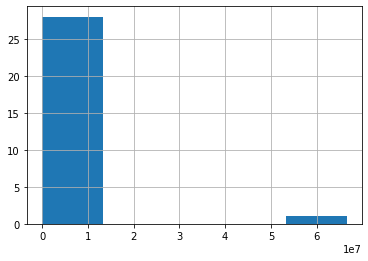

In [41]:
# To get the bin count, use the formula below
binCount = math.sqrt(countyData["Income"].shape[0])
countyData["Income"].hist(bins=round(binCount))

In [45]:
seriousMuseums = moneyMakingMuseums[moneyMakingMuseums["Income"] > 1000]
seriousMuseums

,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,Latitude,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue
0,8400200098,ALASKA AVIATION HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,4721 AIRCRAFT DR,ANCHORAGE,AK,99502,...,61.1793,-149.9725,1.0000,20.0000,2.0000,6,920071852,201312.0000,602912.0000,550236.0000
1,8400200117,ALASKA BOTANICAL GARDEN,ALASKA BOTANICAL GARDEN INC,NaN,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",NaN,4601 CAMPBELL AIRSTRIP RD,ANCHORAGE,AK,99507,...,61.1689,-149.7671,4.0000,20.0000,2.0000,6,920115504,201312.0000,1379576.0000,1323742.0000
2,8400200153,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,NaN,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,NaN,9711 KENAI SPUR HWY,KENAI,AK,99611,...,60.5615,-151.2160,3.0000,122.0000,2.0000,6,921761906,201312.0000,740030.0000,729080.0000
4,8400200027,ALASKA HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,301 W NORTHERN LIGHTS BLVD,ANCHORAGE,AK,99503,...,61.1793,-149.9725,1.0000,20.0000,2.0000,6,920071852,201312.0000,602912.0000,550236.0000
6,8400200078,ALASKA JEWISH MUSEUM,ALASKA JEWISH HISTORICAL MUSEUM AND CULTURAL C...,NaN,GENERAL MUSEUM,NaN,1117 E 35TH AVE,ANCHORAGE,AK,99508,...,61.1895,-149.8607,1.0000,20.0000,2.0000,6,711010049,201312.0000,2658938.0000,34374.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33051,8405600130,WESTERN PLAINS HISTORIC PRESERVATION ASSOCIATION,WESTERN PLAINS HISTORIC PRESERVATION ASSOCIATI...,NaN,HISTORIC PRESERVATION,NaN,2308 HWY 26,LINGLE,WY,82223,...,42.1303,-104.3869,4.0000,15.0000,56.0000,5,830290103.0000,201312.0000,337100.0000,337100.0000
33054,8405600156,WIND RIVER HERITAGE CENTER,WIND RIVER HERITAGE CENTER,NaN,HISTORY MUSEUM,NaN,PO BOX 206,RIVERTON,WY,82501,...,43.0351,-108.3805,3.0000,13.0000,56.0000,5,830317404.0000,201412.0000,36773.0000,36399.0000
33063,8405600122,WYOMING SECONDARY ART EDUCATORS ASSOCIATION,WYOMING SECONDARY ART EDUCATORS ASSOCIATION INC,NaN,ART MUSEUM,NaN,601 GRACE AVE,WORLAND,WY,82401,...,44.0138,-107.9600,3.0000,43.0000,56.0000,5,830265250.0000,201312.0000,43695.0000,43695.0000
33069,8405600158,WYOMING TERRITORIAL PARK HISTORIC ASSOCIATION,WYOMING TERRITORIAL PARK HISTORIC ASSOCIATION INC,NaN,HISTORIC PRESERVATION,NaN,1273 N 15TH ST STE 121,LARAMIE,WY,82072,...,41.3228,-105.5769,3.0000,1.0000,56.0000,5,830318392.0000,201312.0000,208508.0000,83981.0000


214797877.37717992
106.82228231974825


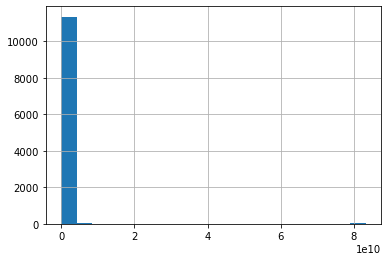

In [46]:
# All revenue Data from all county's
allCountiesIncome = seriousMuseums['Income']
print(allCountiesIncome.mean())

# QUESTION: What does the histogram below mean  (https://statistics.laerd.com/statistical-guides/understanding-histograms.php)
binCount = math.sqrt(allCountiesIncome.shape[0])
print(binCount)
seriousMuseums["Income"].hist(bins=20)

In [60]:
# QUESTION: Are there any statistically significant correlation values? 
seriousMuseums2 = seriousMuseums.corr() > 0.7
seriousMuseums[seriousMuseums2]

,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,Latitude,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue
0,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan
1,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan
2,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan
4,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan
6,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33051,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan
33054,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan
33063,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan
33069,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan


[867963315.62, 33632772.76, 875683082.85, 28123617.45, 110646404.49, 29599370.45, 61471600.92, 61454415.29, 20249148.73, 23283609.69, 934962629.19, 70215867.13, 12428248.79, 9552447.06, 171361452.78, 75518728.05, 287559892.68, 846894084.74, 842455813.58, 95045578.28, 50027879.97, 171994511.11, 115370643.18, 190954394.97, 918788756.85, 90327925.77, 82167029.84, 7337956.87, 871202005.7, 885185904.31, 29061753.71, 17362895.53, 38528955.59, 116806975.26, 9099691.88, 28161275.49, 157586205.23, 26517620.3, 12218132.3, 17288926.07, 105794586.34, 50960337.29, 55629300.52, 906866489.41, 16120338.9, 38986450.77, 856328833.9, 13164265.53, 252955451.51, 99268213.84, 62154829.51, 43394588.51, 136984860.04, 88838026.81, 89462199.48, 34893443.71, 24179744.32, 38737685.18, 83990593.7, 68908344.93, 18725692.99, 843309100.59, 27825807.73, 95138585.16, 46566565.22, 77577553.03, 913197089.62, 100004294.71, 118169953.97, 96552712.5, 840095148.53, 128208485.49, 64391529.8, 39075626.9, 74353158.07, 15658290.

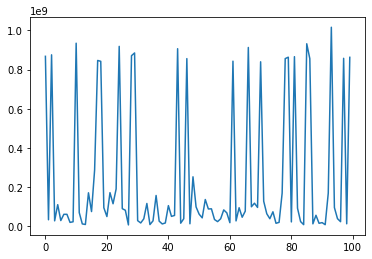

In [69]:
points = []
for x in range(100):
    mean = seriousMuseums["Income"].sample(n=100, random_state=rand.randrange(100000)).mean()
    points.append(mean)
print(points)
plt.plot(points)

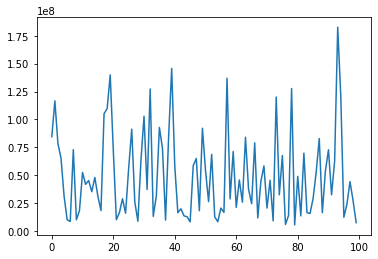

In [306]:
points = []
for x in range(100):
    points.append(seriousMuseums["Revenue"].sample(n=100, random_state=rand.randrange(100000)).mean())
plt.plot(points)